# Exploration of the Data

Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration
### `sales_train.csv`
**Columns**
* `unique_id` - unique id for inventory
* `date` - date
* `warehouse` - warehouse name
* `total_orders` - historical orders for selected Rohlik warehouse **known also for test set**
* `sell_price_main` - sell price
* `type_0_discount`, `type_1_discount`, … - Rohlik is running different types of promo sale actions, these show the percentage of the original price during promo ((original price - current_price) / original_price). Multiple discounts with different type can be run at the same time, **but always the highest possible discount among these types is used for sales. Negative discount value should be interpreted as no discount.**
* `availability` - proportion of the day that the inventory was available to customers. The inventory doesn't need to be available at all times. A value of 1 means it was available for the entire day. This column **is missing in test.csv** as it is not known at the moment of making the prediction.
* `sales` - **Target value**, sales volume (either in pcs or kg) **adjusted by availability**. The sales with lower availability than 1 are already adjusted to full potential sales by Rohlik internal logic. There might be missing dates both in train and test for a given inventory due to various reasons. This column is missing in test.csv as it is target variable.

Because `availability` is not known at test time, and it's not being predicted, we will simply ignore this feature.

In [2]:
df = pd.read_csv('./data/sales_train.csv')
display(df.head())
display(df.describe())
display(df.dtypes)
display(df.isna().sum())

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0


,unique_id,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
count,4.007419e+06,4.007367e+06,4.007367e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06
mean,2.740801e+03,5.995722e+03,1.083808e+02,1.814199e+02,9.253107e-01,8.518626e-03,1.240899e-04,1.163193e-03,5.452819e-06,5.680178e-03,4.049705e-04,1.045480e-02
std,1.558566e+03,2.479598e+03,3.603327e+02,4.611014e+02,1.796205e-01,5.147027e-02,5.142815e-03,1.879977e-02,8.922436e-04,2.892965e-02,9.199913e-03,5.545035e-02
min,0.000000e+00,4.580000e+02,0.000000e+00,2.000000e-02,1.000000e-02,-2.094930e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.712000e-02,0.000000e+00,-8.014900e-01
25%,1.398000e+03,4.402000e+03,1.798000e+01,2.113000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.744000e+03,5.515000e+03,3.952000e+01,4.564000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.084000e+03,8.011000e+03,9.447000e+01,1.121300e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.431000e+03,1.847500e+04,2.631619e+04,2.168299e+04,1.000000e+00,9.916400e-01,5.000000e-01,7.637200e-01,2.506300e-01,4.529000e-01,6.691400e-01,9.000500e-01


unique_id            int64
date                object
warehouse           object
total_orders       float64
sales              float64
sell_price_main    float64
availability       float64
type_0_discount    float64
type_1_discount    float64
type_2_discount    float64
type_3_discount    float64
type_4_discount    float64
type_5_discount    float64
type_6_discount    float64
dtype: object

unique_id           0
date                0
warehouse           0
total_orders       52
sales              52
sell_price_main     0
availability        0
type_0_discount     0
type_1_discount     0
type_2_discount     0
type_3_discount     0
type_4_discount     0
type_5_discount     0
type_6_discount     0
dtype: int64

A few notes for preprocessing:
* Out of millions of datapoints, there are 52-104 that have missing values for the target (`sales`) or `total_orders`. It's best to drop these, as they make up an insignificant proportion of the data.
* We should make `date` a DateTime object for modeling purposes.
* `availability` is not known at test time, so we should drop this.
* The given data explanation states that negative discounts should be treated as no discount, so we will transform each discount to max(0, discount). Also, the highest discount is the only one applied, so a `top_discount` column should be added.

Let's apply these changes.

In [3]:
df = df.dropna()
df = df.drop('availability', axis=1)

df['date'] = pd.to_datetime(df['date'])

discounts = [f'type_{i}_discount' for i in range(7)]
for discount in discounts:
    df.loc[df[discount] < 0, discount] = 0
df['top_discount'] = df[discounts].apply(lambda x: np.max(x), axis=1)

### `unique_id`

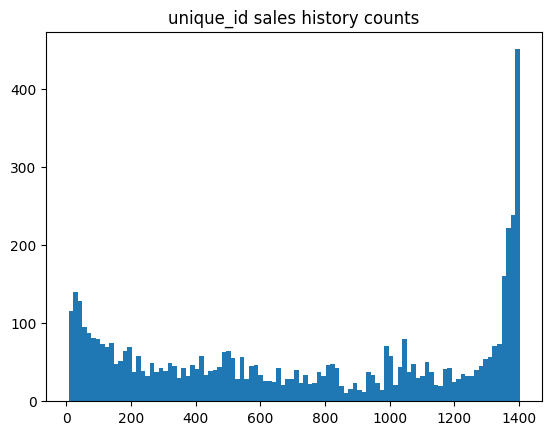

In [4]:
id_counts = df['unique_id'].value_counts()
plt.hist(id_counts, bins=100)
plt.title('unique_id sales history counts')
plt.show()

Wow, so the `unique_id`-based forecasts will have a wide range of available data. I wonder if we need to generate forecasts for each of these products. Let's investigate.

In [5]:
test = pd.read_csv('./data/sales_test.csv')
test_ids = test['unique_id'].unique()
print(f"Number of Unique IDs to forecast: {len(test_ids)}")

Number of Unique IDs to forecast: 3625


So, no. There are at least a thousand products for which we do not need to generate forecasts. Let's check the amount of data for the required forecasts.

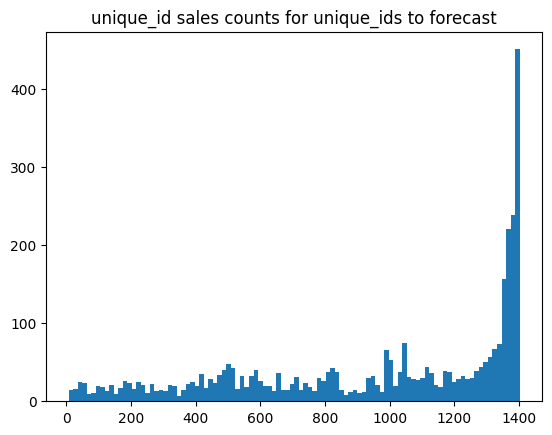

In [6]:
plt.hist(id_counts[test_ids], bins=100)
plt.title('unique_id sales counts for unique_ids to forecast')
plt.show()

Luckily, the left tail has decreased significantly. However, even the data we are not required to forecast will play a role in predicting category-based aggregates.

### `warehouse`

In [7]:
warehouses = df['warehouse'].value_counts()
warehouses.sort_values(ascending=False)
display(warehouses.head(20))

warehouse
Prague_1       780566
Prague_3       779655
Prague_2       770709
Brno_1         643637
Budapest_1     574582
Munich_1       259287
Frankfurt_1    198931
Name: count, dtype: int64

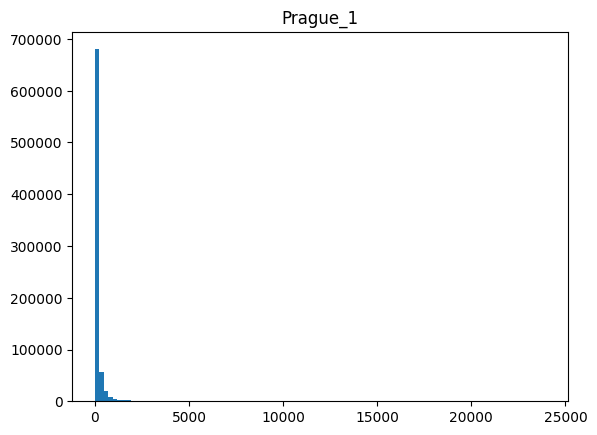

146.6350525772324


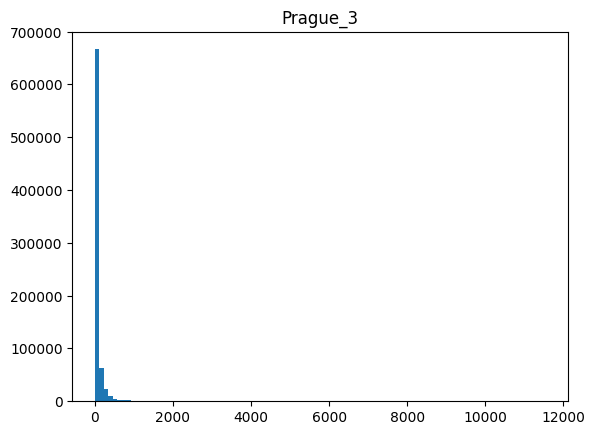

78.31488336507815


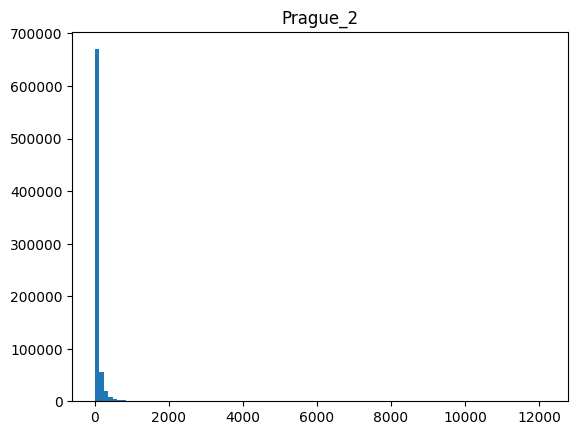

75.20067793421384


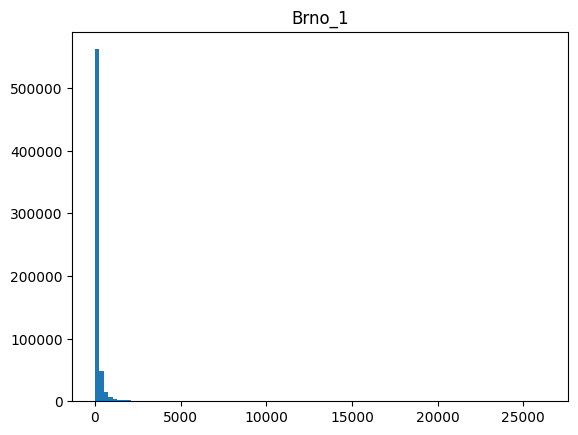

165.8145697497191


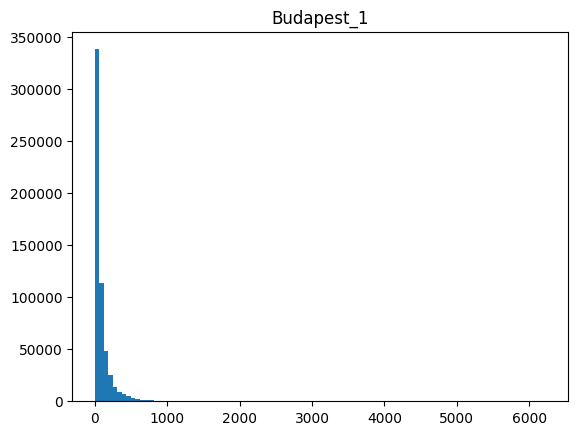

102.9342223042142


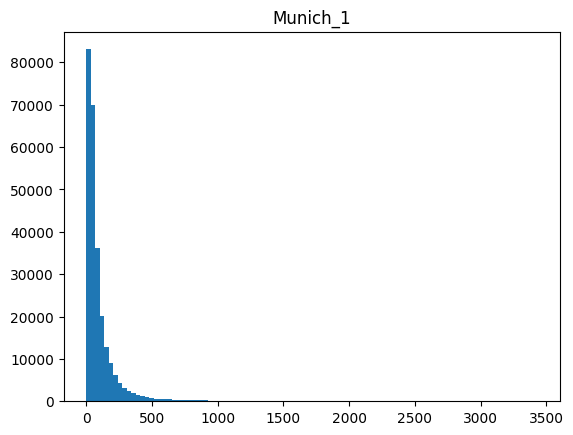

99.51992309680006


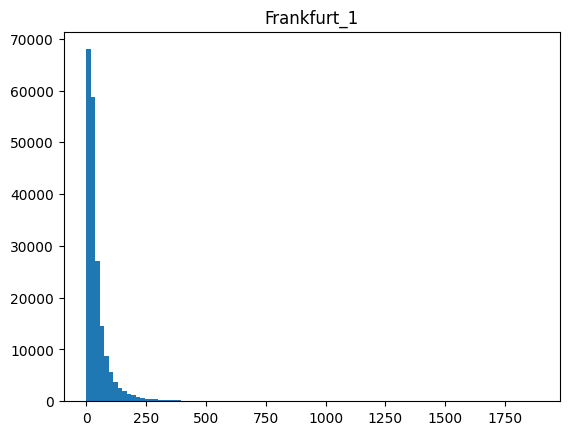

46.11609698840302


In [8]:
for warehouse in warehouses.index:
    sales = df.loc[df['warehouse'] == warehouse]['sales']
    plt.hist(sales, bins=100)
    plt.title(warehouse)
    plt.show()
    print(sales.mean())

Let's log-transform the sales. Since some are 0, we'll add a 0.01 to the argument.

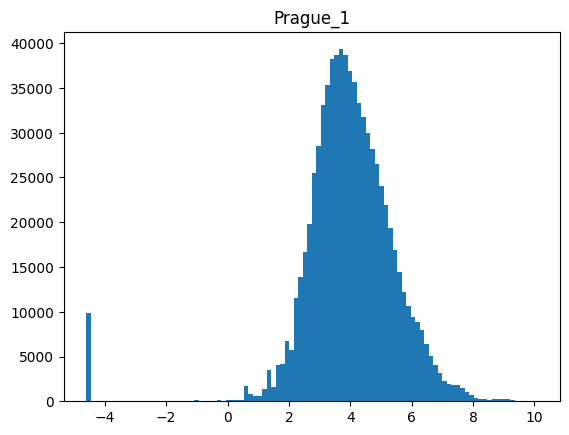

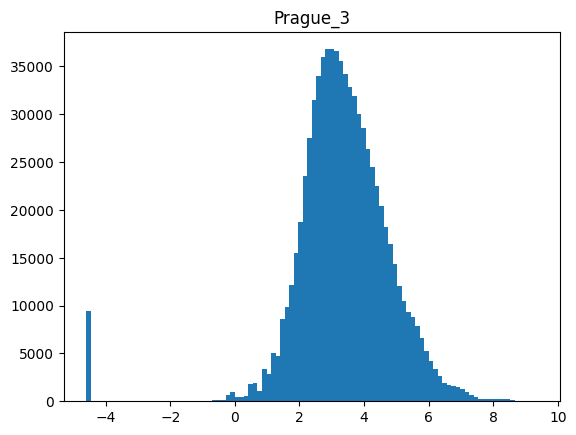

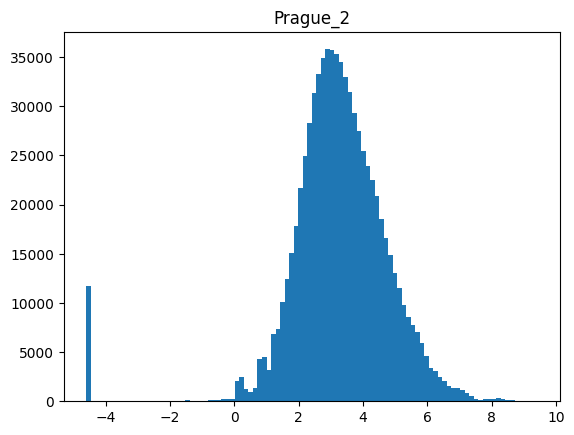

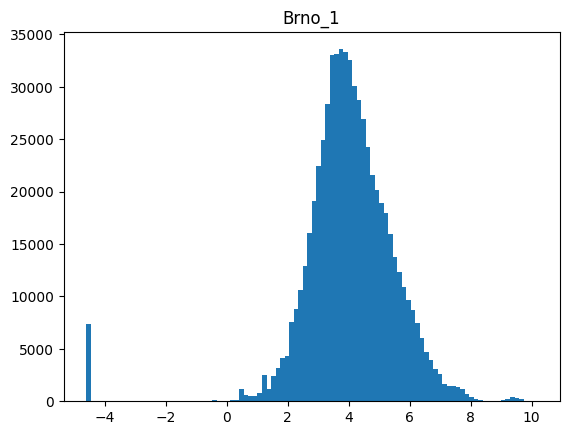

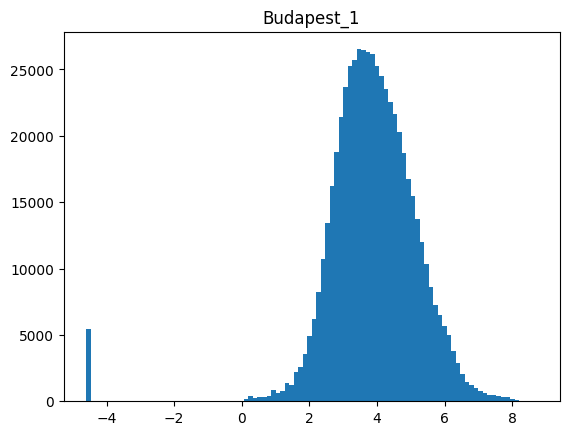

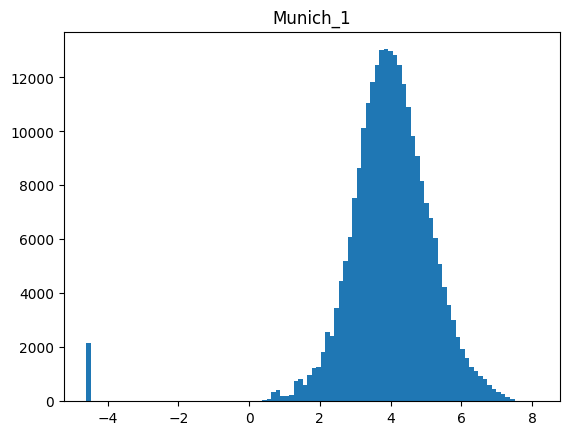

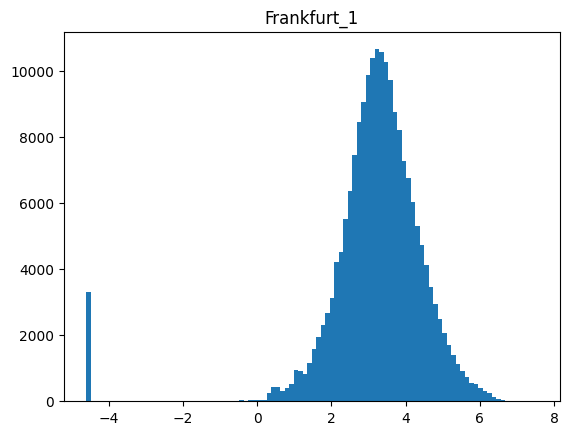

In [9]:
for warehouse in warehouses.index:
    sales = df.loc[df['warehouse'] == warehouse]['sales']
    mean = sales.mean()
    sales = sales.apply(lambda x: np.log(0.01 + x))
    plt.hist(sales, bins=100)
    plt.title(warehouse)
    plt.show()

Clearly, log(sales) is the "better" target, as it's highly normal. Furthermore, the case of 0 sales is easily fixed by the epsilon = 0.01 added to the argument of the logarithm. Then, the case of zero sales is just the extreme left of the distribution.

In [10]:
prague_1 = df.loc[df['warehouse'] == 'Prague_1']
print(f"Unique products for Prague_1 Warehouse: {len(prague_1['unique_id'].unique())}")
product_ids = prague_1['unique_id'].value_counts()
product_ids.head()

Unique products for Prague_1 Warehouse: 857


unique_id
4611    1402
4755    1402
1998    1402
2562    1402
4403    1401
Name: count, dtype: int64

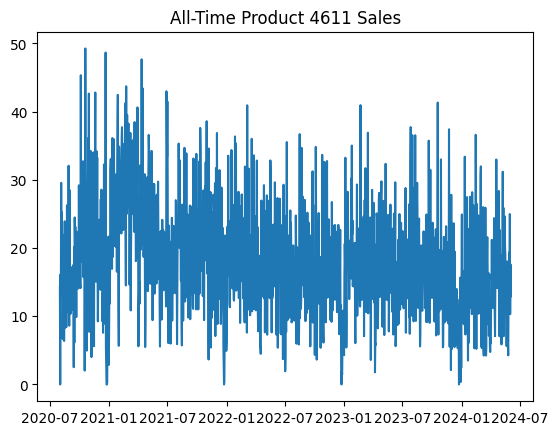

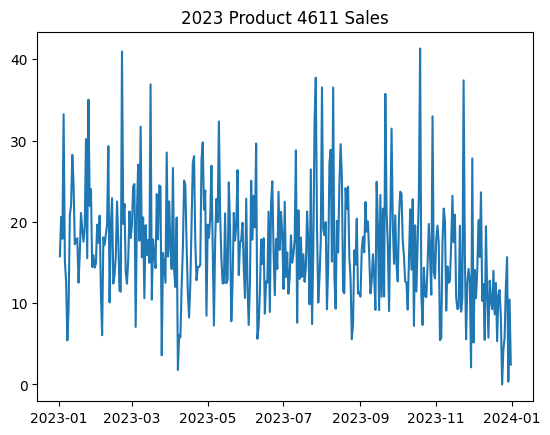

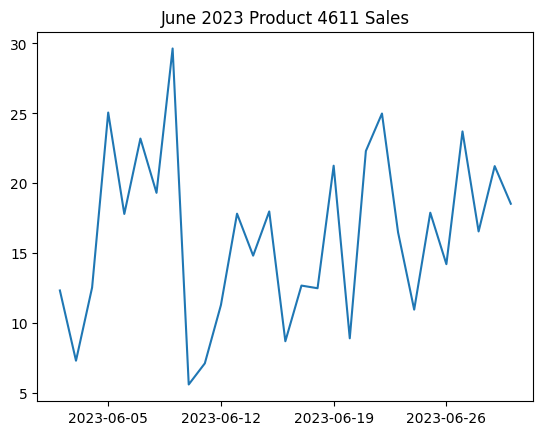

In [11]:
product_4611 = prague_1.loc[prague_1['unique_id'] == 4611].copy()
product_4611.sort_values('date', inplace=True)
plt.plot(product_4611['date'], product_4611['sales'])
plt.title('All-Time Product 4611 Sales')
plt.show()

oneyear = product_4611.loc[(product_4611['date'] > '2023-01-01') & (product_4611['date'] < '2024-01-01')].copy()
plt.plot(oneyear['date'], oneyear['sales'])
plt.title('2023 Product 4611 Sales')
plt.show()

onemonth = product_4611.loc[(product_4611['date'] > '2023-06-01') & (product_4611['date'] < '2023-07-01')].copy()
plt.plot(onemonth['date'], onemonth['sales'])
plt.title('June 2023 Product 4611 Sales')
plt.xticks(['2023-06-05', '2023-06-12', '2023-06-19', '2023-06-26'])
plt.show()

#### Aggregate Sales Trend

,sales
date,
2020-08-01,172887.14
2020-08-02,177492.77
2020-08-03,194435.96
2020-08-04,176477.44
2020-08-05,171293.07
...,...
2024-05-29,362484.19
2024-05-30,395672.84
2024-05-31,497098.91


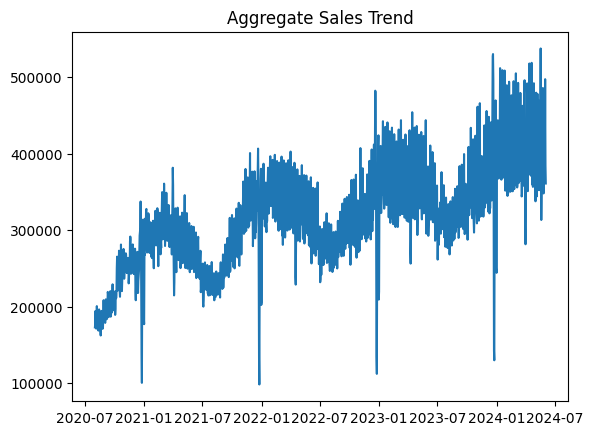

In [12]:
aggregated = df[['date', 'sales']].groupby(['date']).sum()
display(aggregated)
plt.plot(aggregated.index, aggregated['sales'])
plt.title('Aggregate Sales Trend')
plt.show()

...  Christmas?

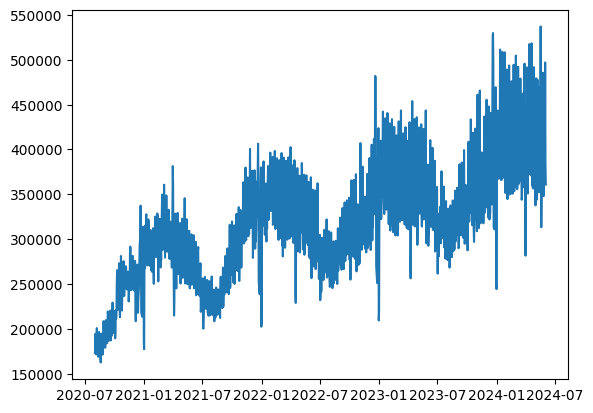

In [13]:
grinch = aggregated.drop(index=['2020-12-25', '2021-12-25', '2022-12-25', '2023-12-25', 
                                '2020-12-24', '2021-12-24', '2022-12-24', '2023-12-24'])
plt.plot(grinch)

Unsurprisingly, there are incredible peaks and troughs around the holiday season. We'll add some flag variables later, available in the `calendar.csv` dataset.

##### By Warehouse

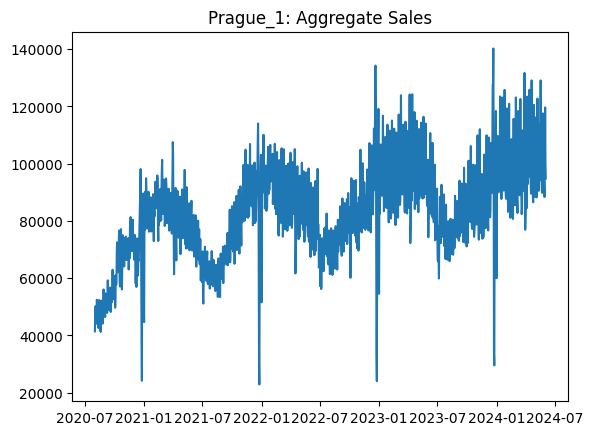

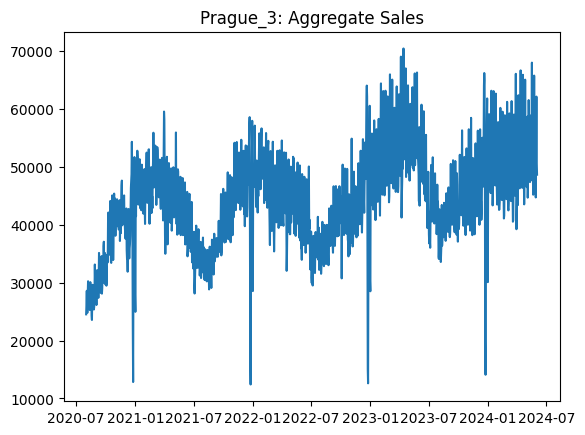

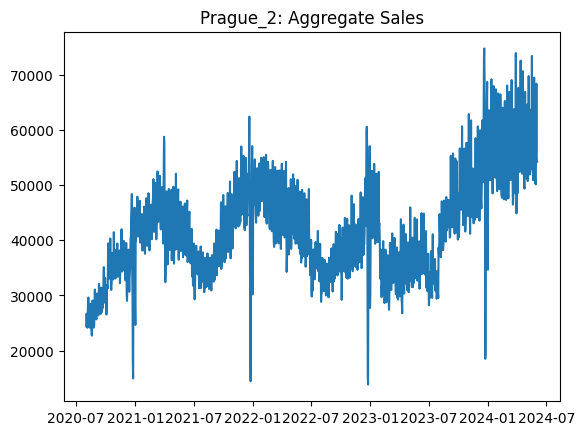

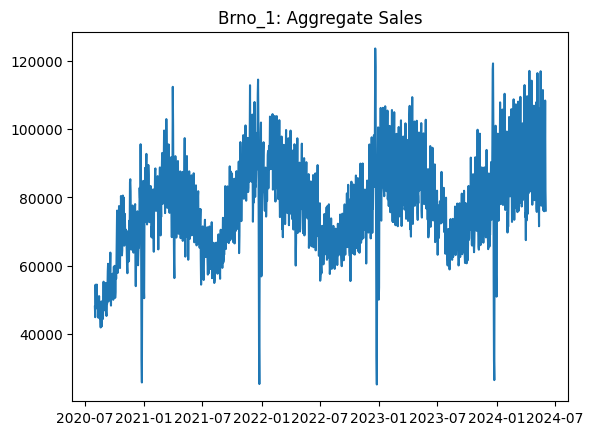

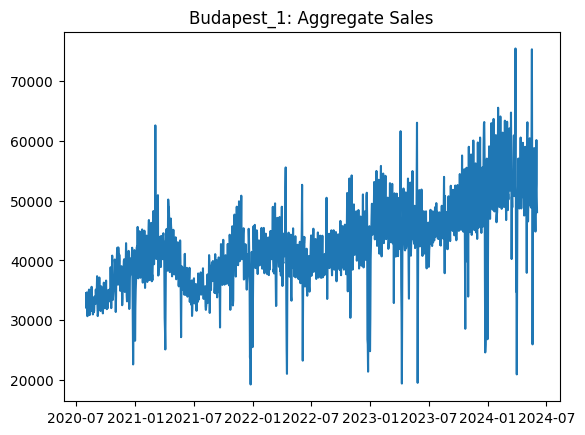

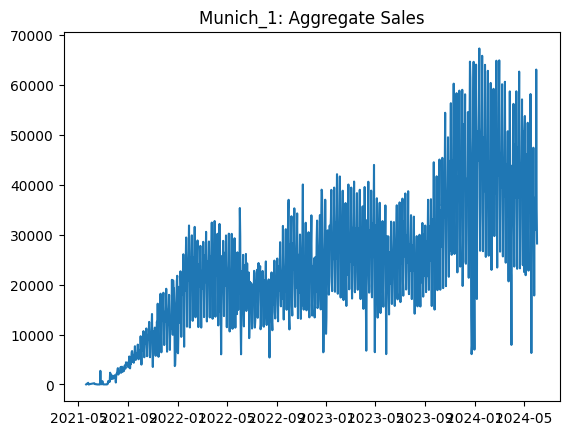

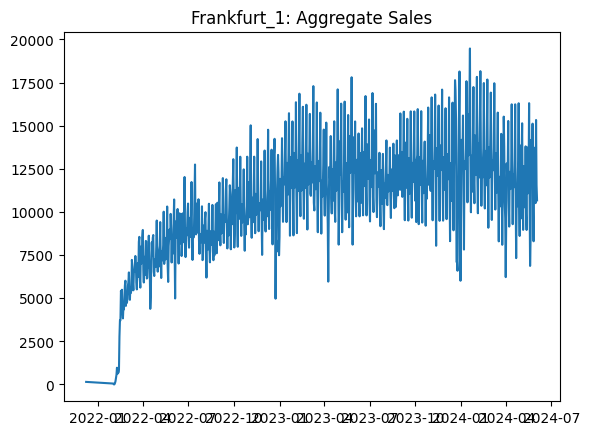

In [14]:
for warehouse in warehouses.index:
    warehouse_df = df.loc[df['warehouse'] == warehouse]
    aggregated = warehouse_df[['date', 'sales']].groupby(['date']).sum()
    plt.plot(aggregated.index, aggregated['sales'])
    plt.title(f'{warehouse}: Aggregate Sales')
    plt.show()

The Prague warehouses have very similar aggregate data, except for the anomolous sunken sales in Prague_2 from around January to September 2023. The Prague_3 warehouse seems to absorb the drop in Prague_2 warehouse sales (likely internal transfer of volume -- reconstruction or something).
*Note:* **We should be careful with this, as our goal is to predict sales in early June 2024.**

As the other Czech Republic location, Brno_1 also shares a similar distribution.

The Budapest warehouse, even with the same four year history, has much less annual seasonality. Unfortunately, it has no compatriot warehouses to compare against.

The German locations are much newer. The Frankfurt location might benefit from a short-term weekly model.

Let's aggregate by country.

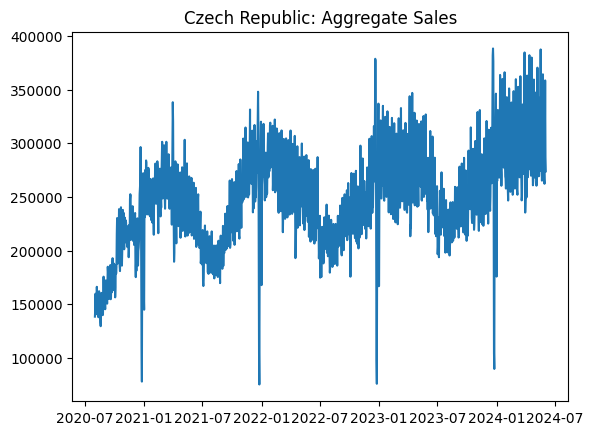

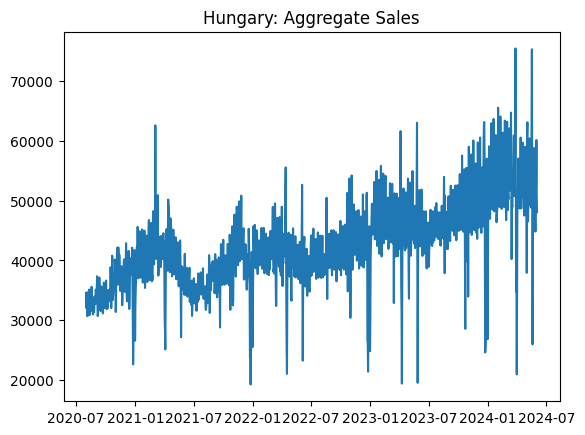

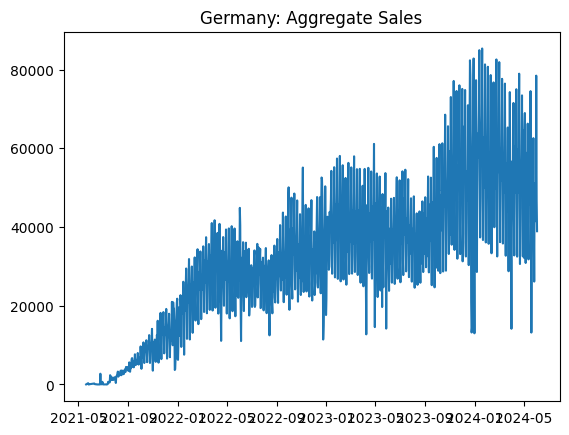

In [15]:
warehouse_to_country = {
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic',
    'Brno_1': 'Czech Republic',
    'Budapest_1': 'Hungary',
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany'
}

df['country'] = df['warehouse'].apply(lambda x: warehouse_to_country[x])
for country in ['Czech Republic', 'Hungary', 'Germany']:
    country_df = df.loc[df['country'] == country]
    aggregated = country_df[['date', 'sales']].groupby(['date']).sum()
    plt.plot(aggregated.index, aggregated['sales'])
    plt.title(f'{country}: Aggregate Sales')
    plt.show()

As the Frankfurt location plateaus, the Munich warehouse explodes with volume. Aggregating across Germany, the trend looks more predictable. Since the Frankfurt warehouse is newer, it's likely that Munich is absorbing some of the volume.

### `inventory.csv`
#### Columns
* `unique_id` - inventory id for a single keeping unit
* `product_unique_id` - product id, inventory in each warehouse has the same product unique id (**same products across all warehouses has the same product id, but different unique id**)
* `name` - inventory id for a single keeping unit
* `L1_category_name`, `L2_category_name`, … - name of the internal category, *the higher the number, the more granular information is present*
* `warehouse` - warehouse name

In [16]:
inventory = pd.read_csv('./data/inventory.csv')
display(inventory.head())
display(inventory.describe())
display(inventory.dtypes)
display(inventory.isna().sum())

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,5255,2583,Pastry_196,Bakery,Bakery_L2_14,Bakery_L3_26,Bakery_L4_1,Prague_3
1,4948,2426,Herb_19,Fruit and vegetable,Fruit and vegetable_L2_30,Fruit and vegetable_L3_86,Fruit and vegetable_L4_1,Prague_3
2,2146,1079,Beet_2,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_65,Fruit and vegetable_L4_34,Prague_1
3,501,260,Chicken_13,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_27,Meat and fish_L4_5,Prague_1
4,4461,2197,Chicory_1,Fruit and vegetable,Fruit and vegetable_L2_17,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Frankfurt_1


,unique_id,product_unique_id
count,5432.000000,5432.000000
mean,2715.500000,1344.782769
std,1568.227662,764.094002
min,0.000000,0.000000
25%,1357.750000,690.000000
50%,2715.500000,1349.500000
75%,4073.250000,2002.000000
max,5431.000000,2669.000000


unique_id               int64
product_unique_id       int64
name                   object
L1_category_name_en    object
L2_category_name_en    object
L3_category_name_en    object
L4_category_name_en    object
warehouse              object
dtype: object

unique_id              0
product_unique_id      0
name                   0
L1_category_name_en    0
L2_category_name_en    0
L3_category_name_en    0
L4_category_name_en    0
warehouse              0
dtype: int64

It looks like `unique_id` gets every integer from 0 to 5431. The `L{i}_category_name_en` feature lets us choose the fineness with which we can aggregate the products. Since the categories play the role of natural grouping, `name` will only serve an explanatory role.

In [17]:
print(f"Unique Products: {len(inventory['product_unique_id'].unique())}")
print(f"Unique L1 Categories: {len(inventory['L1_category_name_en'].unique())}")
print(f"Unique L2 Categories: {len(inventory['L2_category_name_en'].unique())}")
print(f"Unique L3 Categories: {len(inventory['L3_category_name_en'].unique())}")
print(f"Unique L4 Categories: {len(inventory['L4_category_name_en'].unique())}")

Unique Products: 2670
Unique L1 Categories: 3
Unique L2 Categories: 47
Unique L3 Categories: 177
Unique L4 Categories: 68


The data explanations claimed L{i} categories increased in granularity, but L4 has less categories than L3.
Here's a side-by-side to help understand the categories.

Product   | L1                  | L2                        | L3                        | L4
----------|---------------------|---------------------------|---------------------------|-------------------------
Herb_19   |	Fruit and vegetable | Fruit and vegetable_L2_30 | Fruit and vegetable_L3_86 | Fruit and vegetable_L4_1
Chicory_1 |	Fruit and vegetable | Fruit and vegetable_L2_17 | Fruit and vegetable_L3_33 | Fruit and vegetable_L4_1

Herb_19 and Chicory_1 have the same L1 and L4 but different L2 and L3 categories. So, even though L2 has less categories overall than L4, L4 does not distinguish between the products whereas L2 does. We can conclude that the categories are not necessarily hierarchical.

### Product-Level Aggregation

Because the data is relatively small and variable for a single product in a single warehouse, we will need to utilize some aggregation. There are two natural first directions:
1. Measuring the similarities for a single product across different warehouses.
2. Measuring the similarities within a category for a given warehouse.

In [18]:
inventory = pd.read_csv('./data/inventory.csv')

unq_to_L1 = {}
for _, row in inventory.iterrows():
    unq_to_L1[row['unique_id']] = row['L1_category_name_en']
df['L1'] = df['unique_id'].apply(lambda x: unq_to_L1[x])

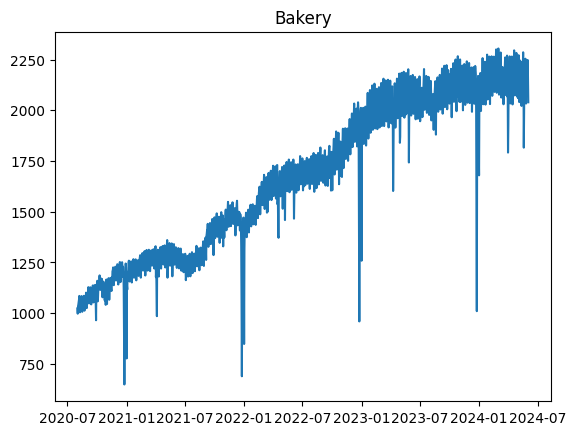

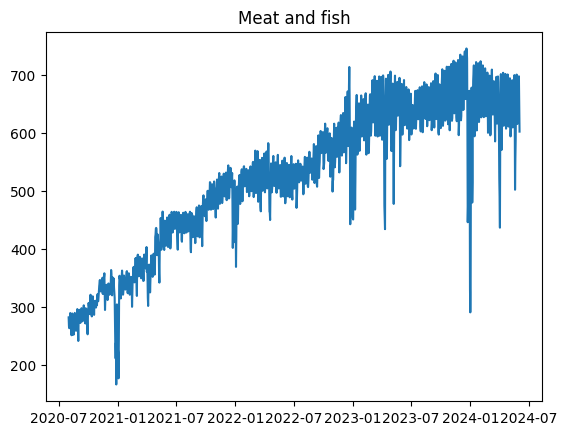

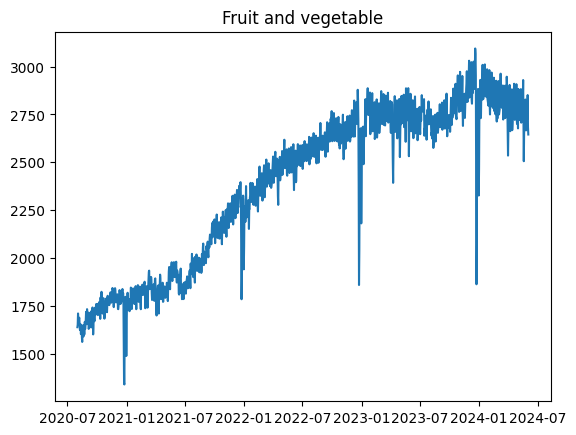

In [19]:
for cat in df['L1'].unique():
    cat_df = df.loc[df['L1'] == cat, ['date', 'sales']]
    cat_df['power_sales'] = cat_df['sales'].apply(lambda x: x**(1/8))
    prod_agg = cat_df[['date', 'power_sales']].groupby('date').sum()
    plt.plot(prod_agg)
    plt.title(cat)
    plt.show()

Let's subtract the linear trend.

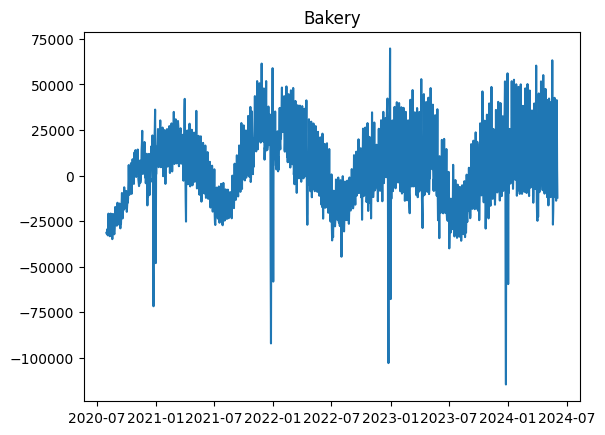

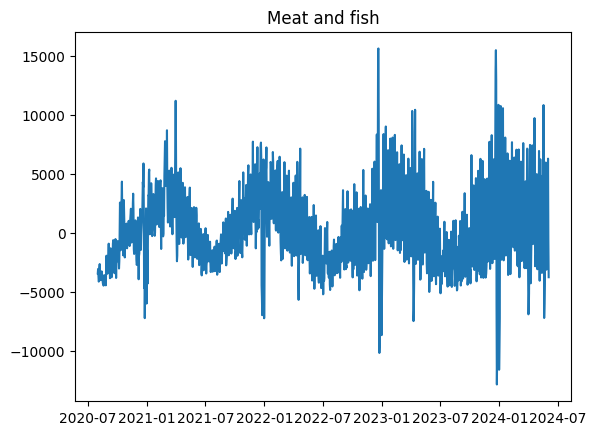

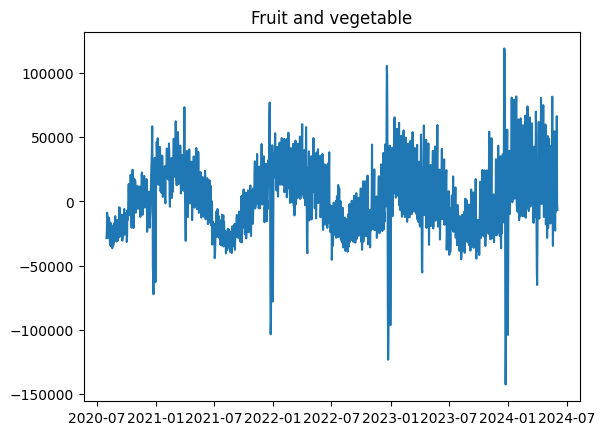

In [20]:
from sklearn.linear_model import LinearRegression
for cat in df['L1'].unique():
    cat_df = df.loc[df['L1'] == cat]
    prod_agg = cat_df[['date', 'sales']].groupby('date').sum()
    linear = LinearRegression().fit(prod_agg.index.astype(int).to_numpy().reshape(-1,1), prod_agg['sales'])
    plt.plot(prod_agg['sales'] - linear.predict(prod_agg.index.astype(int).to_numpy().reshape(-1, 1)))
    plt.title(cat)
    plt.show()

The variance grow with time, so let's try a log-transform first.

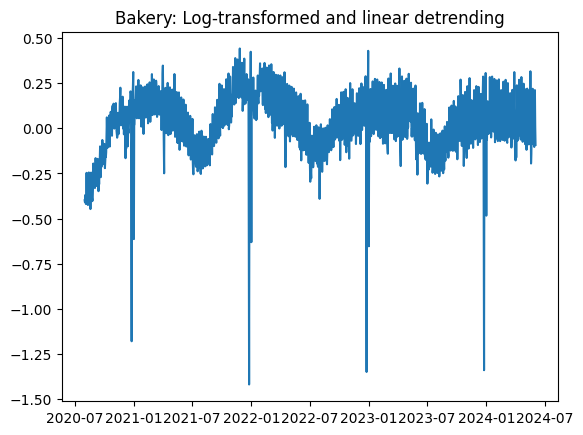

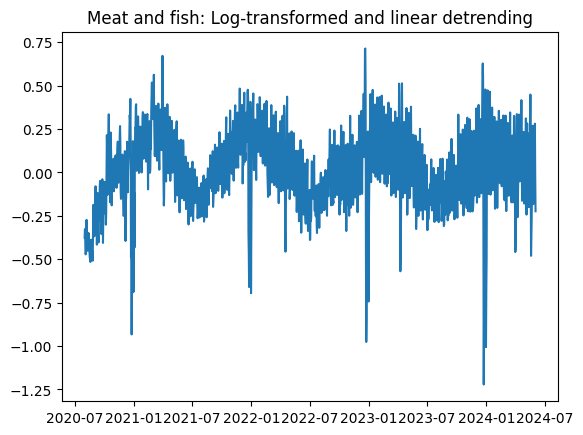

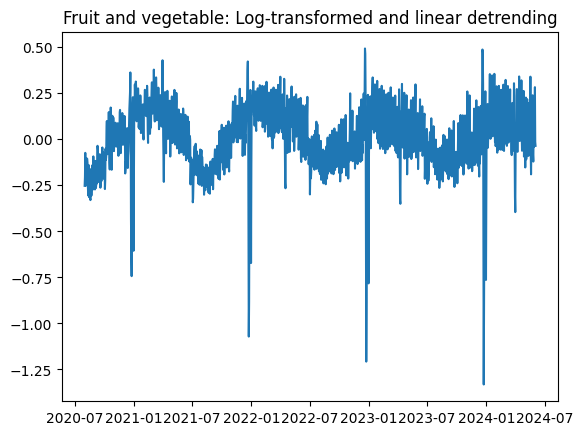

In [21]:
from sklearn.linear_model import LinearRegression
for cat in df['L1'].unique():
    cat_df = df.loc[df['L1'] == cat]
    prod_agg = cat_df[['date', 'sales']].groupby('date').sum()
    prod_agg['sales'] = prod_agg['sales'].apply(lambda x: np.log(x))
    linear = LinearRegression().fit(prod_agg.index.astype(
        int).to_numpy().reshape(-1, 1), prod_agg['sales'])
    plt.plot(prod_agg['sales'] -
             linear.predict(prod_agg.index.astype(int).to_numpy().reshape(-1, 1)))
    plt.title(f'{cat}: Log-transformed and linear detrending')
    plt.show()

Let's zoom in on the holidays.

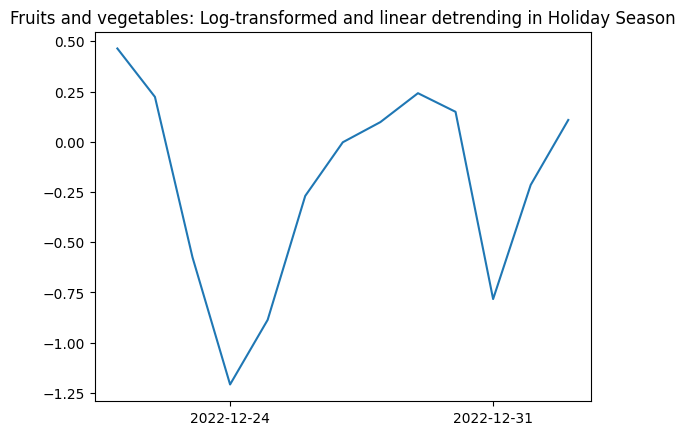

In [22]:
holiday_2023 = prod_agg.loc[(prod_agg.index < '2023-01-03') & (prod_agg.index > '2022-12-20')]
plt.plot(holiday_2023['sales'] -linear.predict(holiday_2023.index.astype(int).to_numpy().reshape(-1, 1)))
plt.title(f'Fruits and vegetables: Log-transformed and linear detrending in Holiday Season')
plt.xticks(['2022-12-24', '2022-12-31'])
plt.show()

It looks like the sales take a dip on the Eves of Christmas and New Year's.

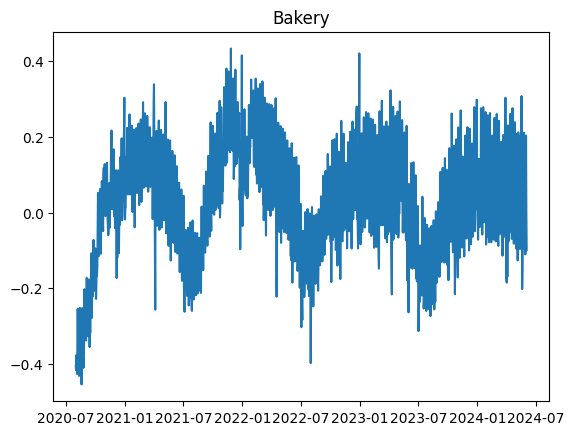

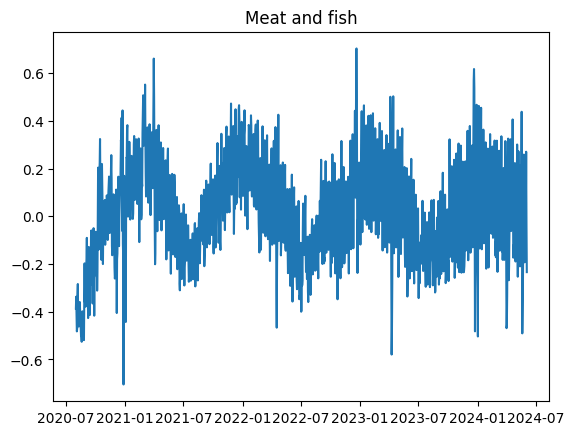

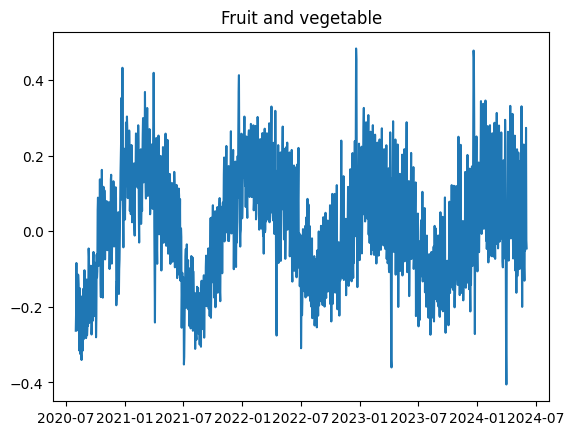

In [23]:
from sklearn.linear_model import LinearRegression

def engineer(df: pd.DataFrame):
    df['sales'] = df['sales'].apply(lambda x: np.log(1 + x))
    idx = df.index
    df.reset_index(inplace=True)
    df.index = idx
    for date in ['12-23', '12-24', '12-25', '12-26', '12-31', '01-01']:
        df[date] = df['date'].apply(lambda x: int(str(x)[5:10] == date))
    df['date'] = df['date'].astype(int) / 1e11
    df['date'] = (df['date'] - np.min(df['date'])) / 864
    return df[df.columns]

for cat in df['L1'].unique():
    cat_df = df.loc[df['L1'] == cat]
    prod_agg = cat_df[['date', 'sales']].groupby('date').sum()
    data = engineer(prod_agg)
    linear = LinearRegression().fit(data.drop('sales', axis=1), data['sales'])
    plt.plot(data['sales'] - linear.predict(data.drop('sales', axis=1)))
    plt.title(cat)
    plt.show()

Let's add some seasonality.

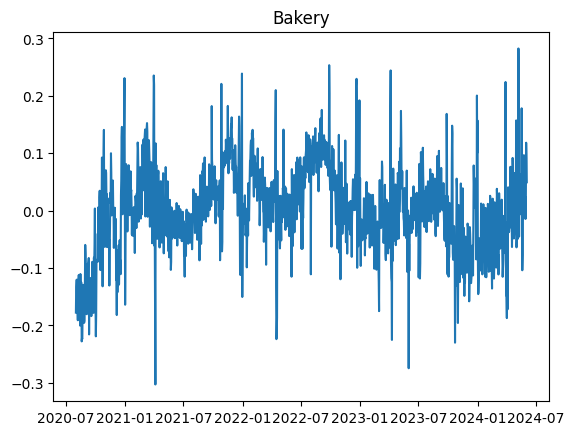

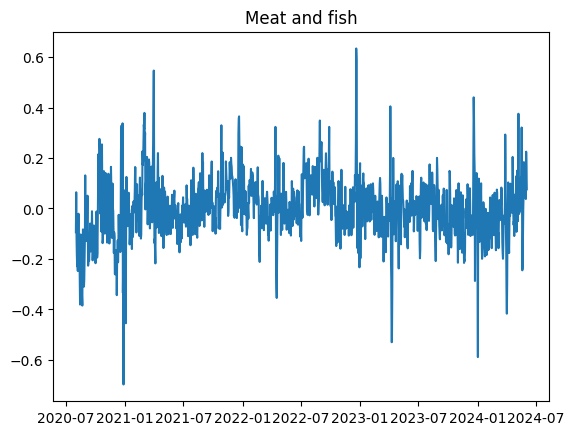

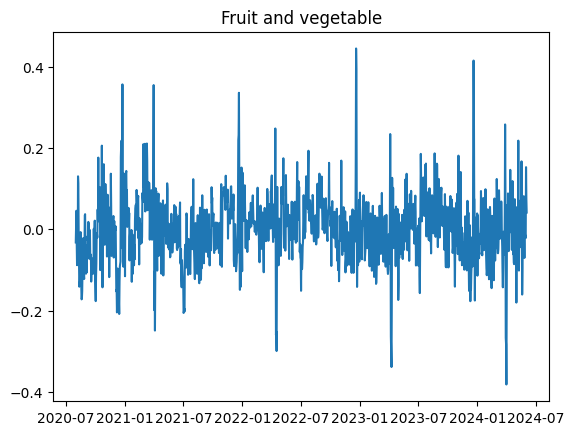

In [24]:
def weeks(df):
    df['weekday'] = [day.weekday() for day in df.index]
    df = pd.concat([df.drop('weekday', axis=1), pd.get_dummies(df['weekday'], prefix='weekday')], axis=1)
    return df

def seasonality(df):
    df['sin_biyear'] = df['date'].apply(lambda x: np.sin(np.pi * x / 365))
    df['cos_biyear'] = df['date'].apply(lambda x: np.cos(np.pi * x / 365))
    df['sin_year'] = df['date'].apply(lambda x: np.sin(2 * np.pi * x / 365))
    df['cos_year'] = df['date'].apply(lambda x: np.cos(2 * np.pi * x / 365))
    df['sin_year/2'] = df['date'].apply(lambda x: np.sin(4 * np.pi * x / 365))
    df['cos_year/2'] = df['date'].apply(lambda x: np.cos(4 * np.pi * x / 365))
    df['sin_year/3'] = df['date'].apply(lambda x: np.sin(6 * np.pi * x / 365))
    df['cos_year/3'] = df['date'].apply(lambda x: np.cos(6 * np.pi * x / 365))
    df['sin_year/4'] = df['date'].apply(lambda x: np.sin(8 * np.pi * x / 365))
    df['cos_year/4'] = df['date'].apply(lambda x: np.cos(8 * np.pi * x / 365))
    df['sin_monthly'] = df['date'].apply(lambda x: np.sin(24 * np.pi * x / 365))
    df['cos_monthly'] = df['date'].apply(lambda x: np.cos(24 * np.pi * x / 365))
    return df

for cat in df['L1'].unique():
    cat_df = df.loc[df['L1'] == cat]
    prod_agg = cat_df[['date', 'sales']].groupby('date').sum()
    prod_agg = weeks(prod_agg)
    data = engineer(prod_agg)
    data = seasonality(data)
    linear = LinearRegression().fit(data.drop('sales', axis=1), data['sales'])
    plt.plot(data['sales'] - linear.predict(data.drop('sales', axis=1)))
    plt.title(cat)
    plt.show()

How do these work at country level?

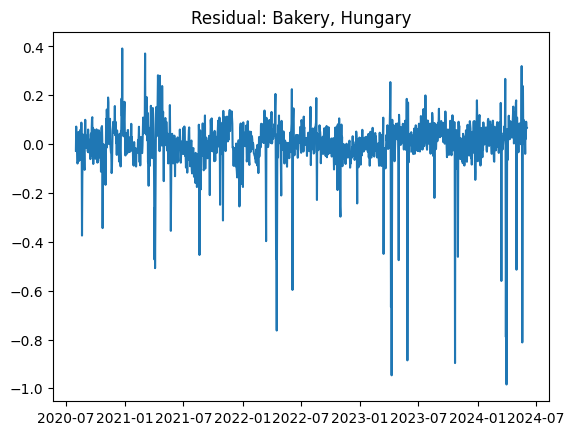

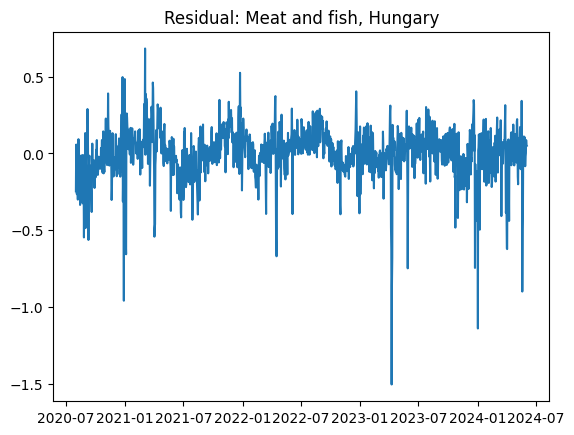

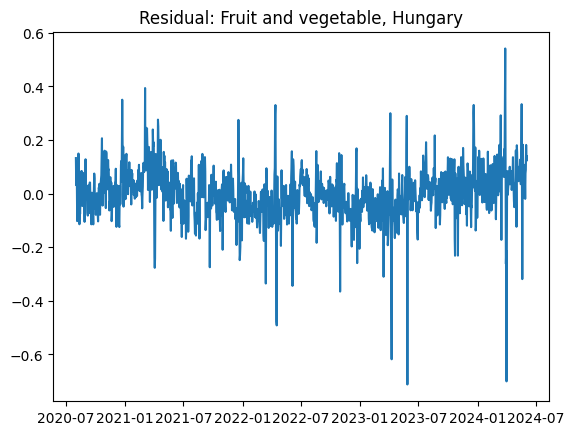

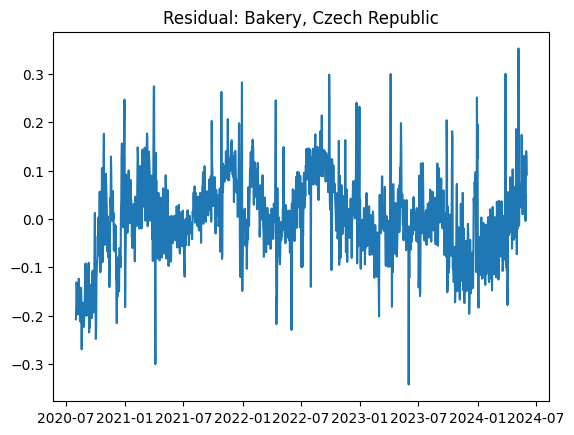

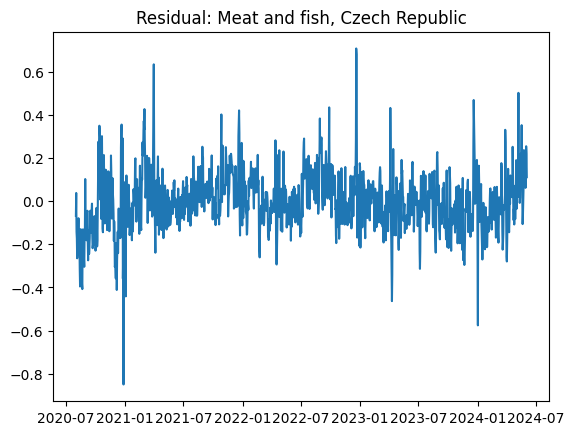

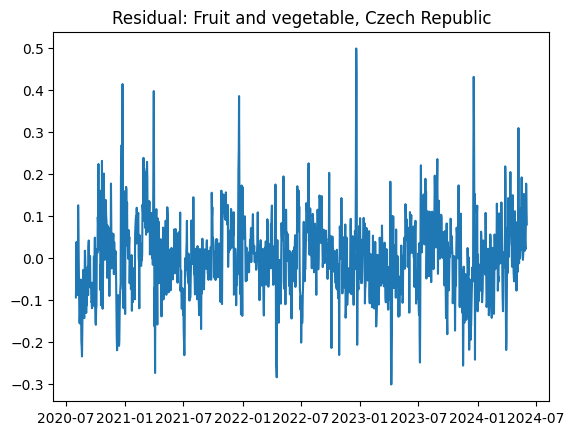

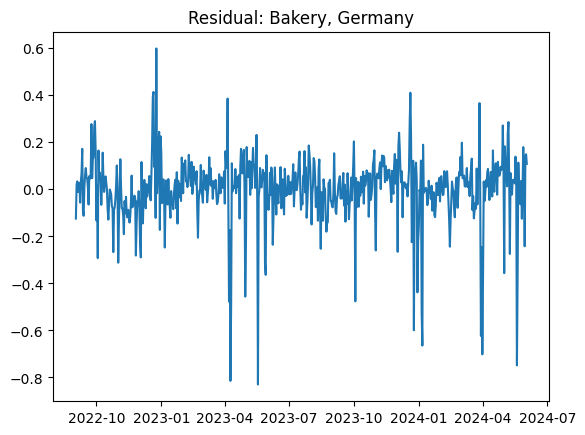

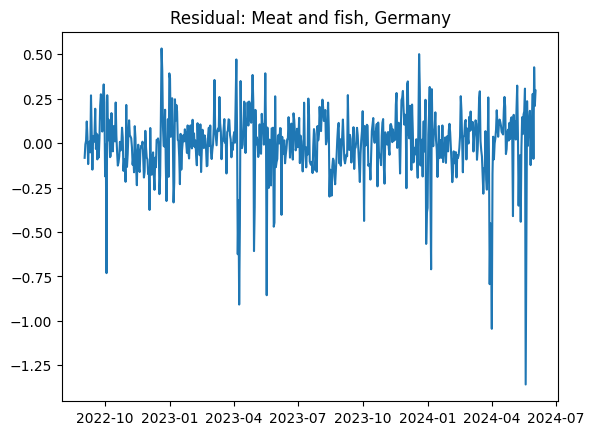

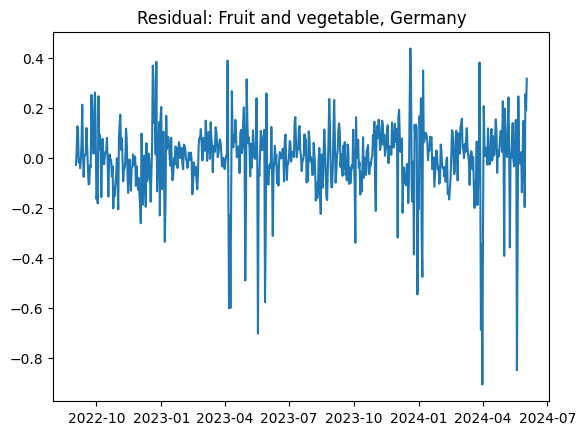

In [25]:
for country in df['country'].unique():
    country_df = df.loc[df['country'] == country]
    for cat in df['L1'].unique():
        cat_df = country_df.loc[country_df['L1'] == cat]
        prod_agg = cat_df[['date', 'sales']].groupby('date').sum()
        prod_agg = weeks(prod_agg)
        data = engineer(prod_agg)
        data = seasonality(data)
        if country == 'Germany':
            data = data.loc[data.index > '2022-09-01']
        linear = LinearRegression().fit(data.drop('sales', axis=1), data['sales'])
        plt.plot(data['sales'] - linear.predict(data.drop('sales', axis=1)))
        plt.title(f'Residual: {cat}, {country}')
        plt.show()

# Sales-Price Discovery

In [26]:
weights = pd.read_csv('./data/test_weights.csv')
eda = pd.read_csv('./data/sales_train.csv')

eda = eda.sort_values(['unique_id', 'date'], axis=0)
last_date = eda[['unique_id', 'date']].groupby(
    ['unique_id']).last().reset_index().drop_duplicates()
last = last_date.merge(weights, how='left', on='unique_id')
last = last.merge(eda, how='left', on=['unique_id', 'date']).dropna(axis=0)
last.head(5)

,unique_id,date,weight,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,0,2023-07-28,2.535369,Budapest_1,5621.0,66.71,853.20,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2024-06-02,3.888933,Frankfurt_1,1204.0,206.75,2.87,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2024-06-02,5.885237,Munich_1,2962.0,405.00,3.34,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2024-06-02,2.139552,Budapest_1,6088.0,78.60,702.89,0.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2023-06-26,3.021715,Frankfurt_1,1529.0,68.59,2.23,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0


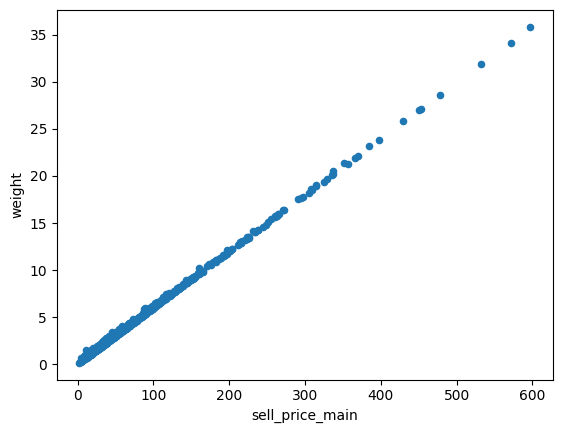

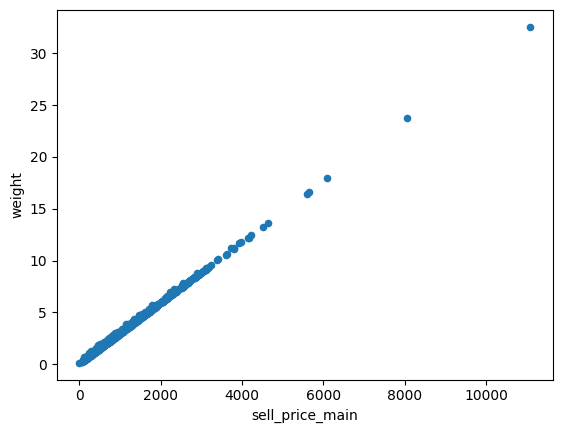

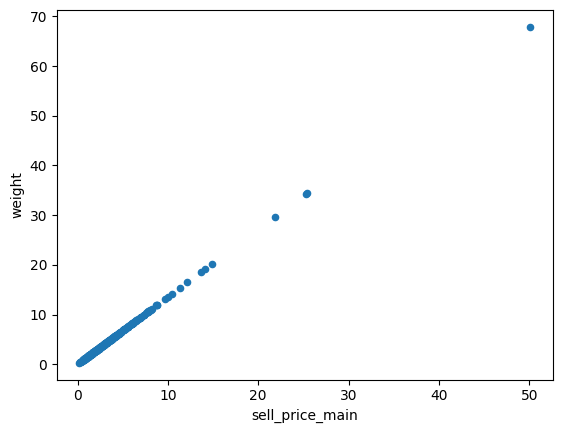

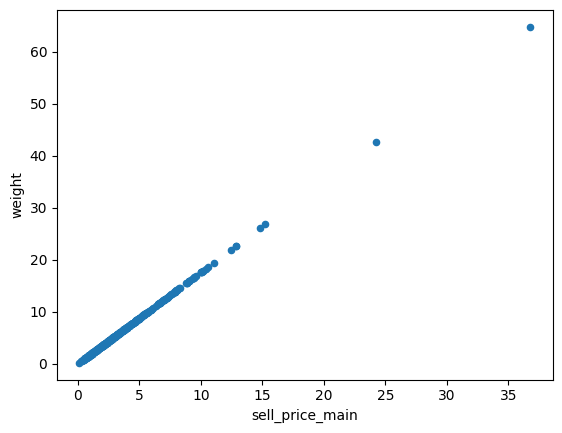

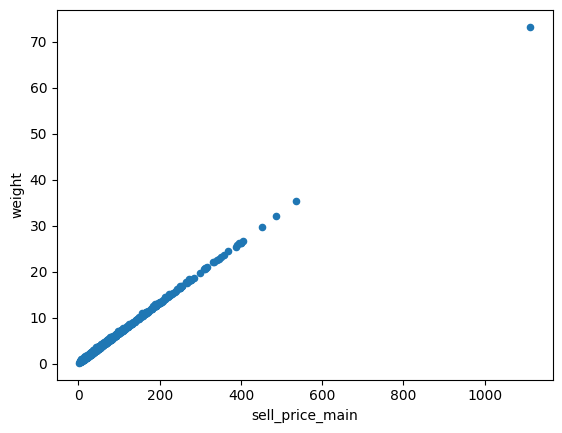

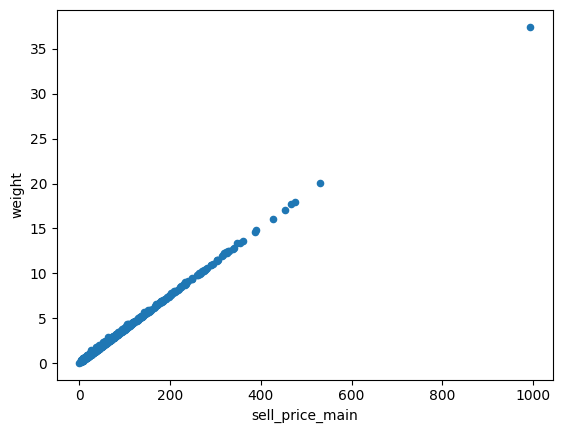

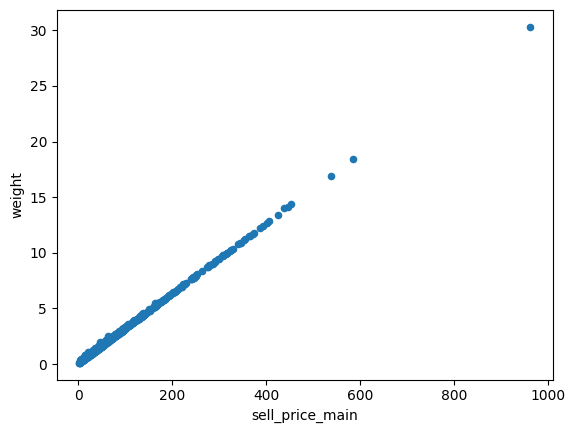

In [28]:
last.groupby('warehouse').plot(x='sell_price_main', y='weight', kind='scatter')
plt.show()

Aha! `sell_price_main` is solidly proportional to `weight` when grouped by warehouse. This makes sense. We should encourage the model to reduce the forecast discrepency for products with more sales variability.

In [29]:
def slope(df: pd.DataFrame):
    return (df['weight'] * df['sell_price_main']).sum() / (df['sell_price_main']**2).sum()

print('---=== Empirical weight / price ===---')
last.groupby('warehouse').apply(slope, include_groups=False)

---=== Empirical weight / price ===---


warehouse
Brno_1         0.060415
Budapest_1     0.002977
Frankfurt_1    1.355029
Munich_1       1.762047
Prague_1       0.066596
Prague_2       0.038047
Prague_3       0.031790
dtype: float64